In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_path1 = 'ThiTNTHPT2020.xlsx'
df_20 = pd.read_excel(file_path1)
file_path2 = 'ThiTNTHPT2021.xlsx'
df_21 = pd.read_excel(file_path2)
file_path3 = 'ThiTNTHPT2022.xlsx'
df_22 = pd.read_excel(file_path3)
file_path4 = 'ThiTNTHPT2023.xlsx'
df_23 = pd.read_excel(file_path4)
file_path5 = 'ThiTNTHPT2024.xlsx'
df_24 = pd.read_excel(file_path5)

In [5]:
df_20['year'] = '2020'
df_21['year'] = '2021'
df_22['year'] = '2022'
df_23['year'] = '2023'
df_24['year'] = '2024'

In [6]:
for df in [df_20, df_21, df_22, df_23, df_24]:
    df['year'] = pd.to_numeric(df['year'], errors='coerce')
    df['vat_li'] = pd.to_numeric(df['vat_li'], errors='coerce')

In [7]:
df_20.info()
df_21.info()
df_22.info()
df_23.info()
df_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   sbd        1048575 non-null  object 
 1   dia_li     674101 non-null   float64
 2   gdcd       581049 non-null   float64
 3   hoa_hoc    350783 non-null   float64
 4   lich_su    689794 non-null   float64
 5   ngoai_ngu  924449 non-null   float64
 6   ngu_van    1031717 non-null  float64
 7   sinh_hoc   344520 non-null   float64
 8   toan       1044020 non-null  float64
 9   vat_li     348296 non-null   float64
 10  year       1048575 non-null  int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 88.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925107 entries, 0 to 925106
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   sbd        925107 non-null  int64  
 1   toan       915849 non-null  float64
 2 

In [8]:
df_all = pd.concat([df_20, df_21, df_22, df_23, df_24], ignore_index=True)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5039758 entries, 0 to 5039757
Data columns (total 11 columns):
 #   Column     Dtype  
---  ------     -----  
 0   sbd        object 
 1   dia_li     float64
 2   gdcd       float64
 3   hoa_hoc    float64
 4   lich_su    float64
 5   ngoai_ngu  float64
 6   ngu_van    float64
 7   sinh_hoc   float64
 8   toan       float64
 9   vat_li     float64
 10  year       int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 423.0+ MB


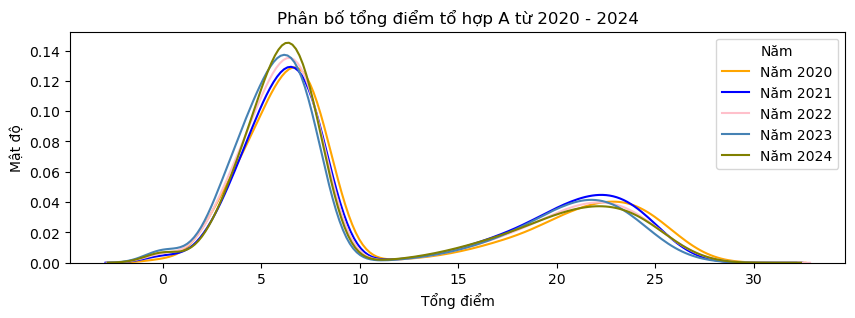

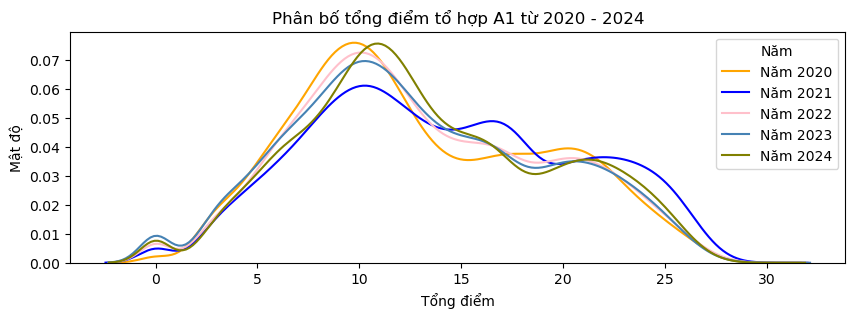

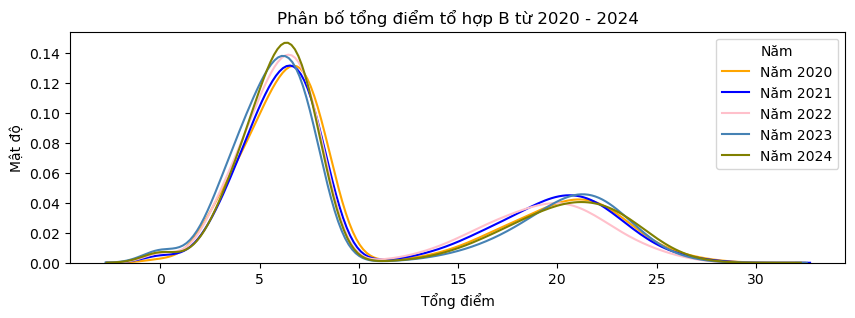

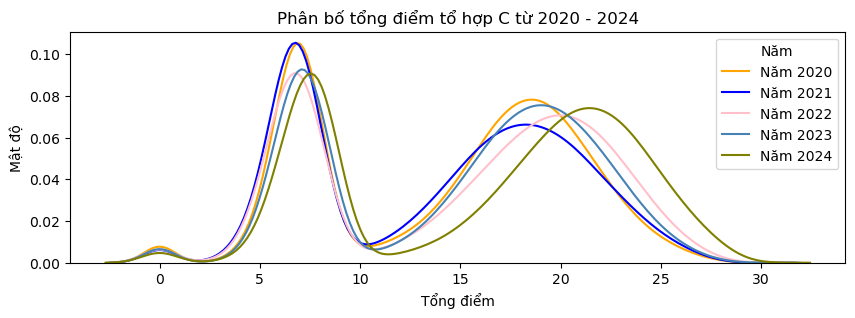

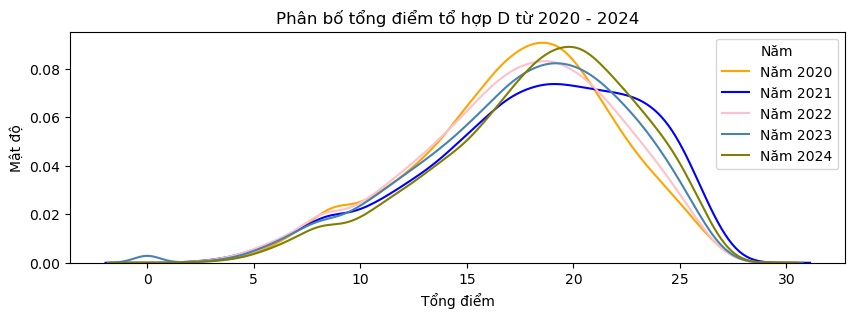

In [9]:
# Tính tổng điểm cho tổ hợp A,B,C,D và thay thế các giá trị NaN bằng 0
df_all['A'] = df_all['toan'].fillna(0) + df_all['vat_li'].fillna(0) + df_all['hoa_hoc'].fillna(0)

df_all['A1'] = df_all['toan'].fillna(0) + df_all['vat_li'].fillna(0) + df_all['ngoai_ngu'].fillna(0)

df_all['B'] = df_all['toan'].fillna(0) + df_all['sinh_hoc'].fillna(0) + df_all['hoa_hoc'].fillna(0)

df_all['C'] = df_all['ngu_van'].fillna(0) + df_all['lich_su'].fillna(0) + df_all['dia_li'].fillna(0)

df_all['D'] = df_all['toan'].fillna(0) + df_all['ngoai_ngu'].fillna(0) + df_all['ngu_van'].fillna(0)

# Danh sách các tổ hợp điểm cần phân tích
combines = ['A', 'A1', 'B', 'C', 'D']

# Danh sách màu sắc cho các đường biểu diễn trong biểu đồ
colors = ['orange', 'blue', 'pink', 'steelblue', 'olive']

# Vòng lặp để vẽ biểu đồ phân bố mật độ cho từng tổ hợp điểm qua các năm
for combo in combines:
    plt.figure(figsize=(10, 3))  # Tạo một khung hình với kích thước 10x3
    for year, color in zip([2020, 2021, 2022, 2023, 2024], colors):  # Lặp qua từng năm và màu sắc tương ứng
        data = df_all[df_all['year'] == year][combo].dropna()  # Lấy dữ liệu của tổ hợp điểm cho từng năm, loại bỏ giá trị NaN
        sns.kdeplot(data, label=f'Năm {year}', color=color, bw_adjust=2)  # 
    plt.title(f'Phân bố tổng điểm tổ hợp {combo} từ 2020 - 2024')  # 
    plt.xlabel('Tổng điểm')  # Đặt nhãn cho trục x
    plt.ylabel('Mật độ')  # Đặt nhãn cho trục y
    plt.legend(title='Năm')  # Hiển thị chú giải cho biểu đồ
    plt.grid(False)  # Tắt lưới trong biểu đồ
    plt.show()  


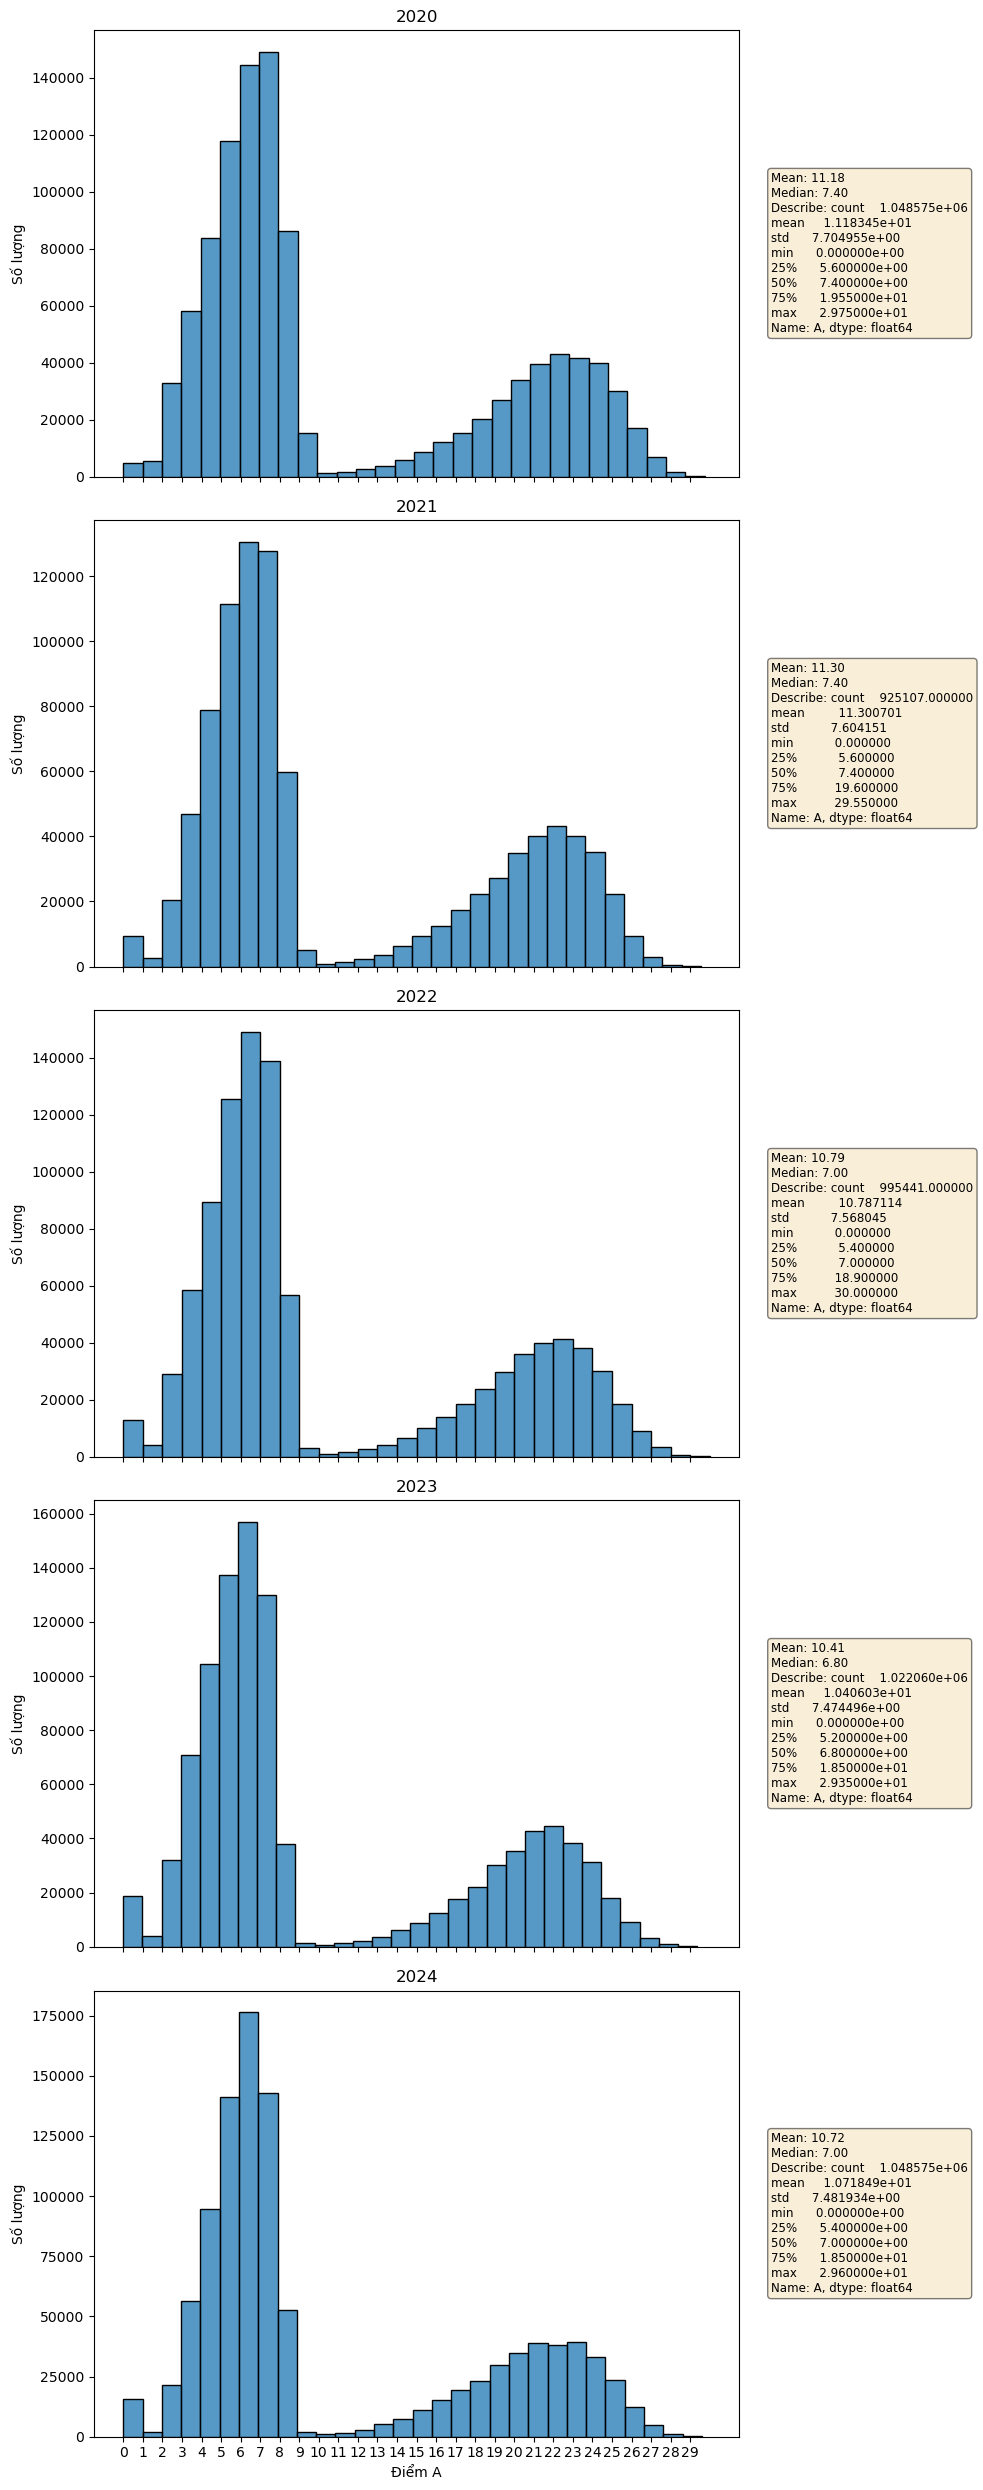

In [10]:
sub = 'A' # tổ hợp A

recent_years = df_all[df_all['year'].isin([2020, 2021, 2022, 2023, 2024])]

Score = list(range(0, 30, 1))

recent_years_sorted = sorted(recent_years['year'].unique())

# sắp xếp số lượng subplots dựa trên số năm 
Fig, axes = plt.subplots(len(recent_years_sorted), 1, figsize=(10, 5 * len(recent_years_sorted)), sharex=True)

# Nếu chỉ có 1 năm thì lấy là chính nó
if len(recent_years_sorted) == 1:
    axes = [axes]

for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year][sub], bins=30, kde=False, ax=axes[i], edgecolor='black')
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel(f'Điểm {sub}')
    axes[i].set_ylabel('Số lượng')

    year_data = recent_years[recent_years['year'] == year][sub].dropna()
    mean = year_data.mean()
    median = year_data.median()
    df_all_describe = year_data.describe()

    textstr = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nDescribe: {df_all_describe}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[i].text(1.05, 0.5, textstr, transform=axes[i].transAxes, fontsize=8.5,
                 verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(Score)
plt.tight_layout()
plt.show()

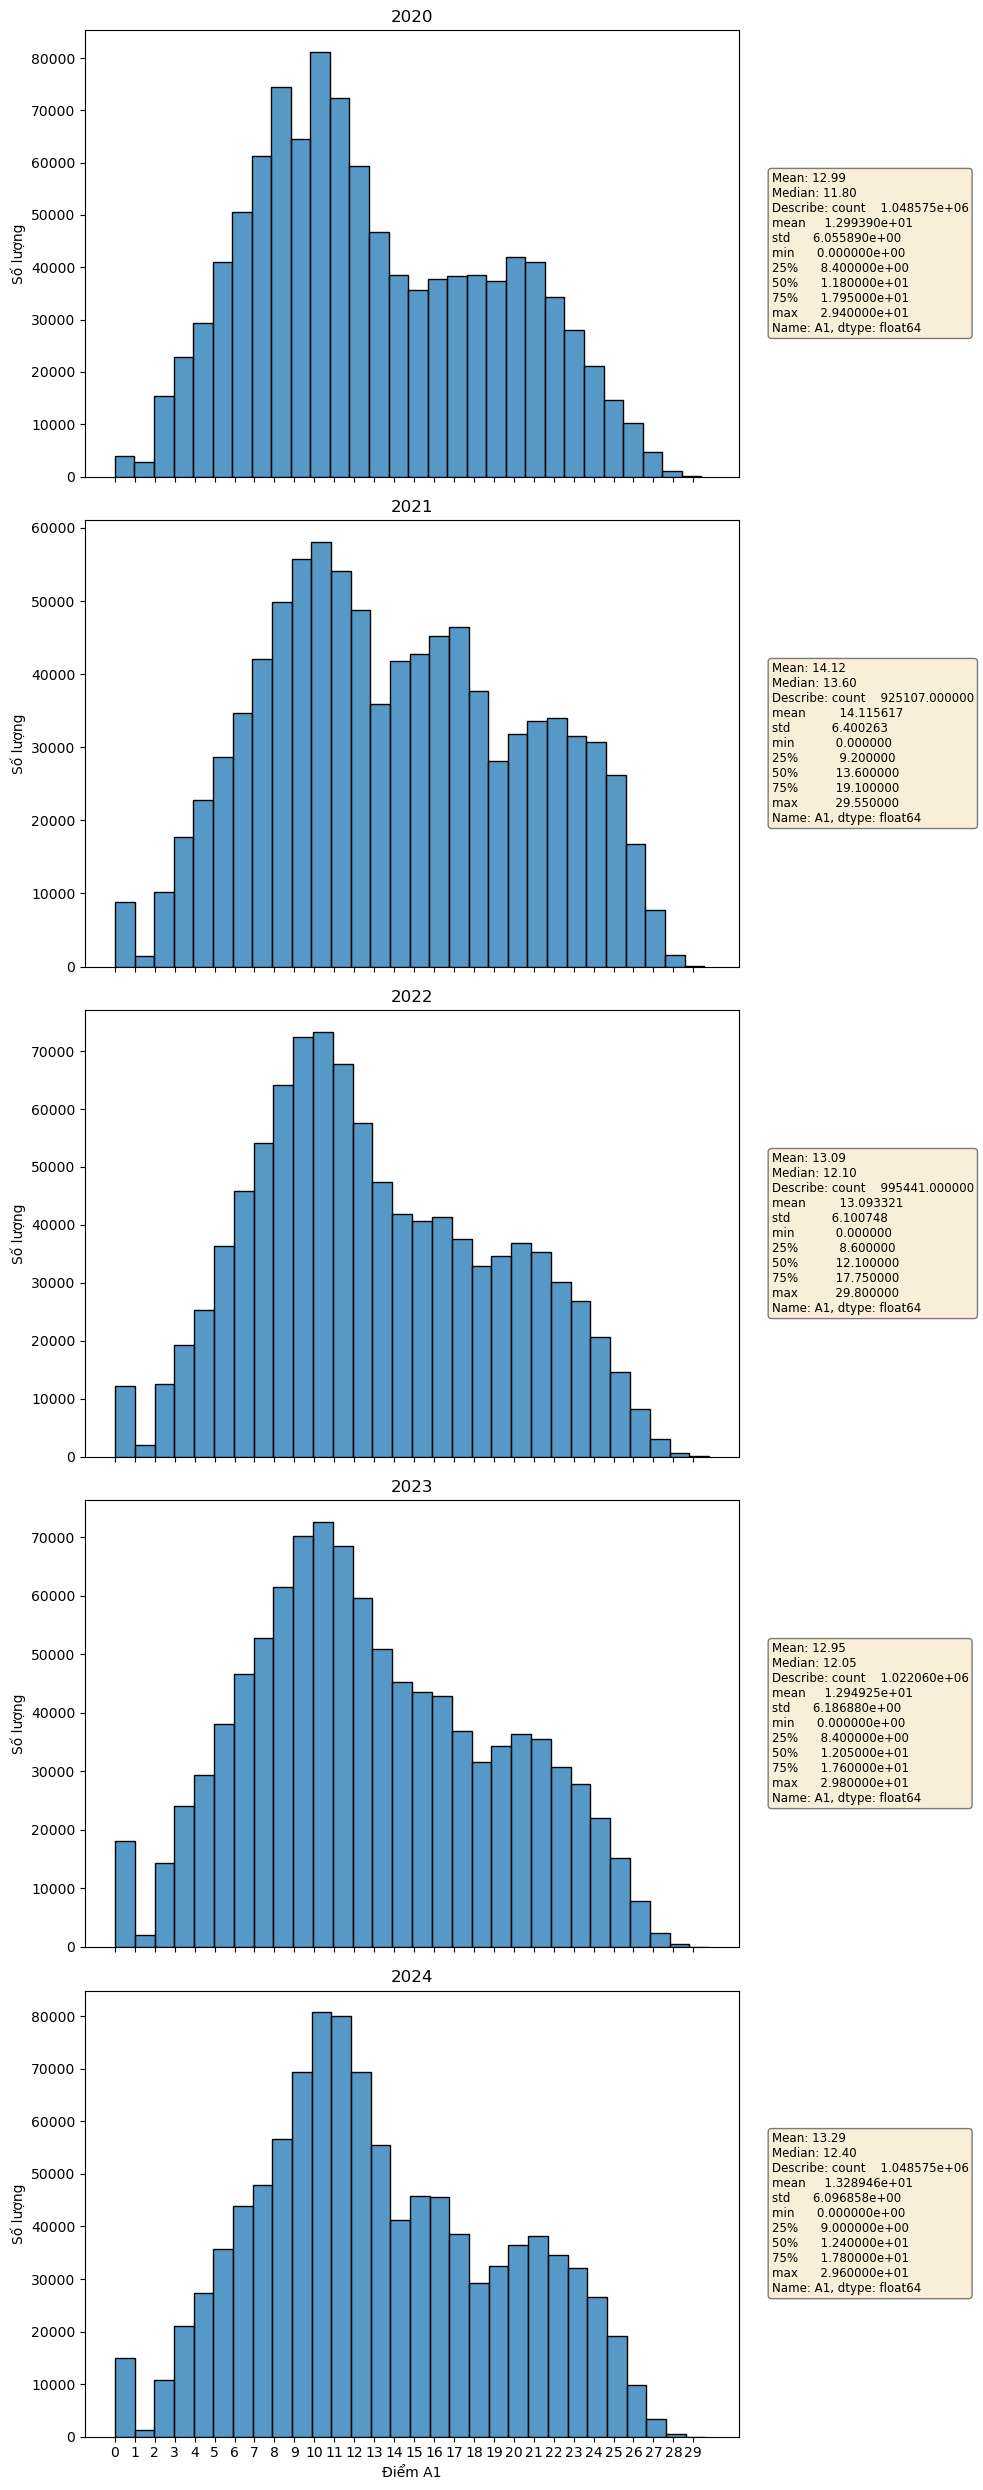

In [11]:
sub = 'A1' #Tổ hợp A1

recent_years = df_all[df_all['year'].isin([2020, 2021, 2022, 2023, 2024])]

Score = list(range(0, 30, 1))

recent_years_sorted = sorted(recent_years['year'].unique())

# sắp xếp số lượng subplots dựa trên số năm 
Fig, axes = plt.subplots(len(recent_years_sorted), 1, figsize=(10, 5 * len(recent_years_sorted)), sharex=True)

# Nếu chỉ có 1 năm thì lấy là chính nó
if len(recent_years_sorted) == 1:
    axes = [axes]

for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year][sub], bins=30, kde=False, ax=axes[i], edgecolor='black')
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel(f'Điểm {sub}')
    axes[i].set_ylabel('Số lượng')

    year_data = recent_years[recent_years['year'] == year][sub].dropna()
    mean = year_data.mean()
    median = year_data.median()
    df_all_describe = year_data.describe()

    textstr = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nDescribe: {df_all_describe}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[i].text(1.05, 0.5, textstr, transform=axes[i].transAxes, fontsize=8.5,
                 verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(Score)
plt.tight_layout()
plt.show()

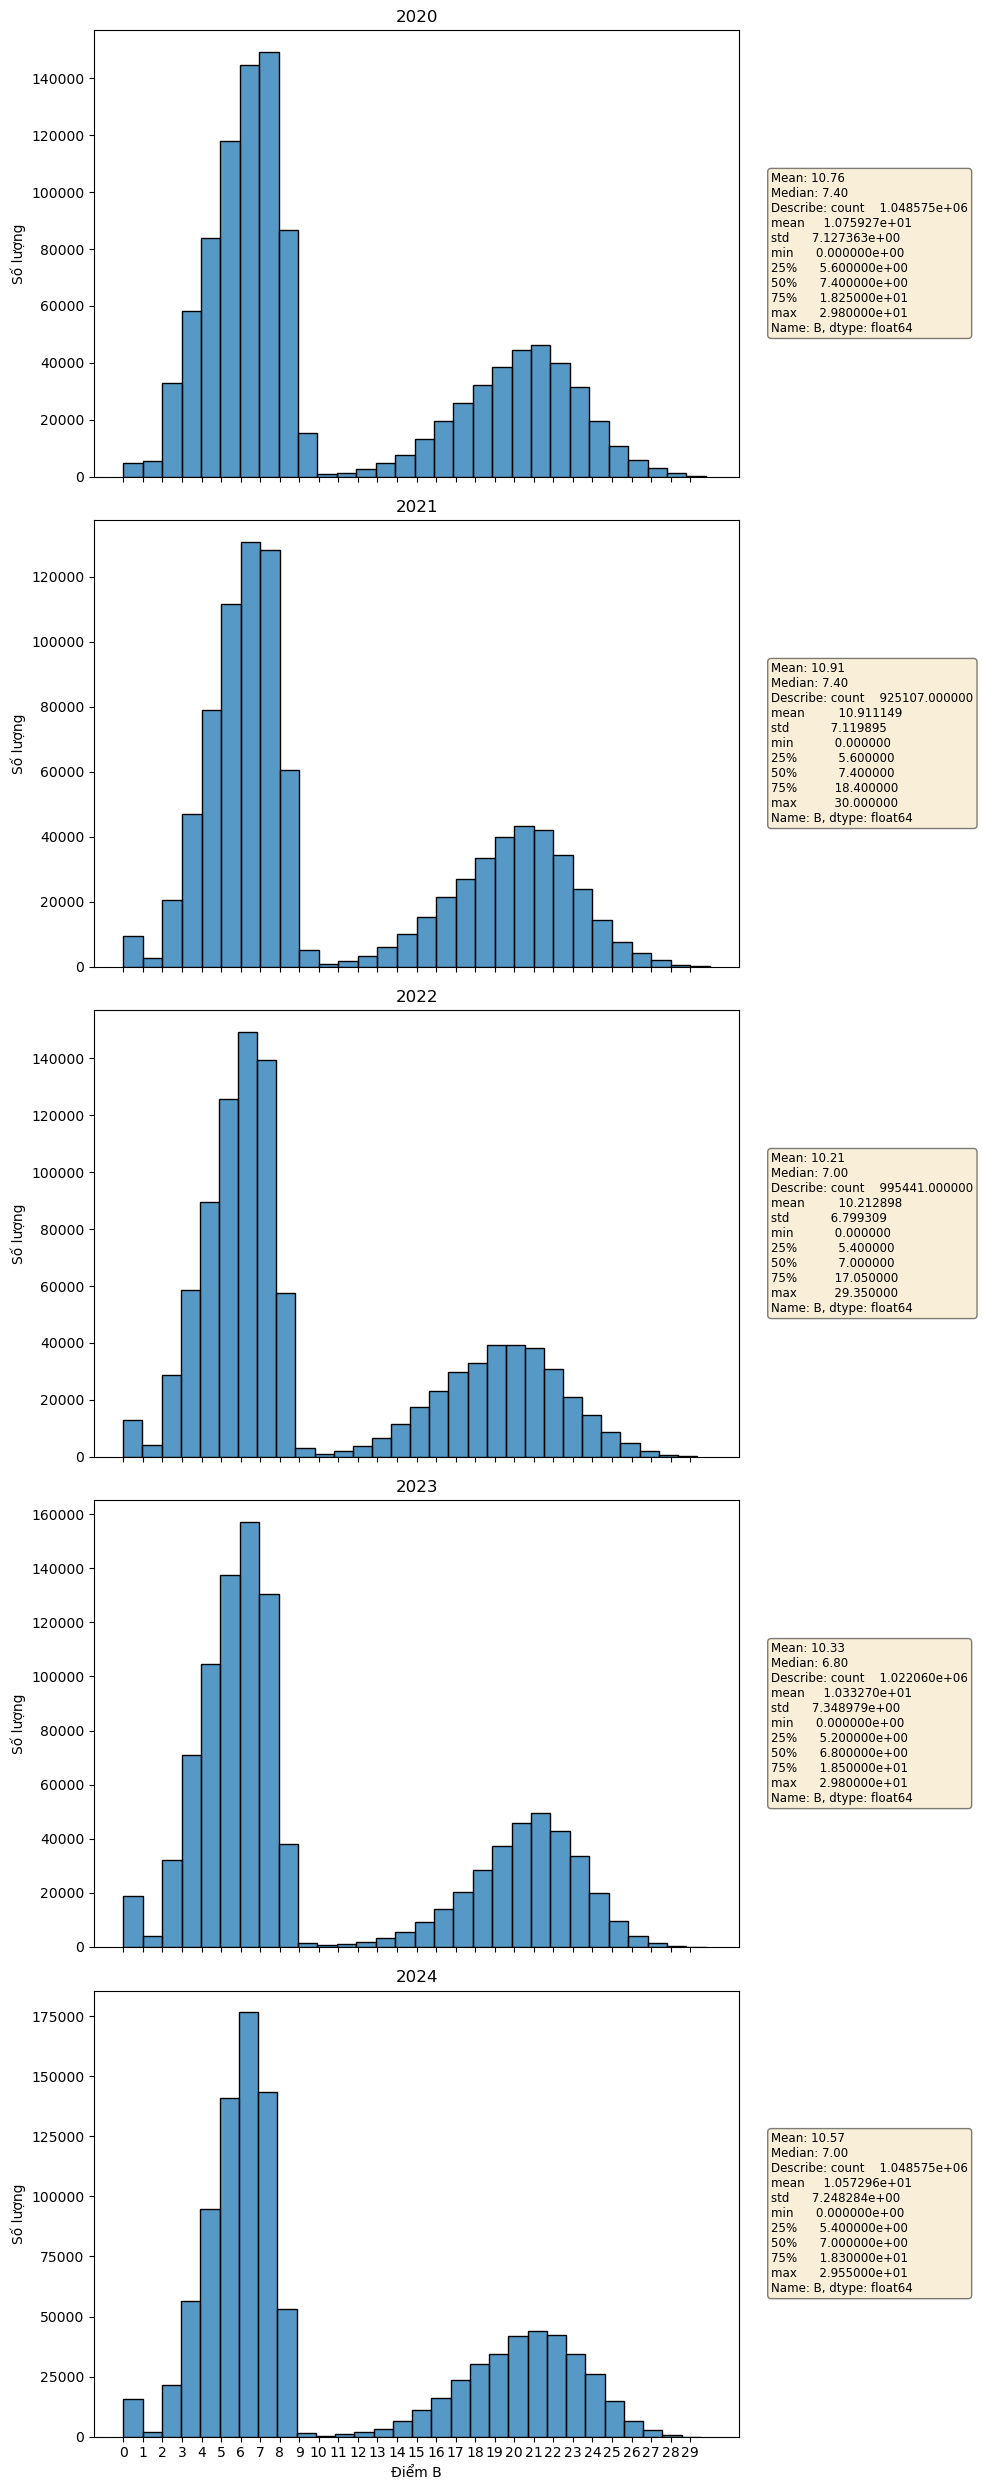

In [12]:
sub = 'B' #Tổ hợp B

recent_years = df_all[df_all['year'].isin([2020, 2021, 2022, 2023, 2024])]

Score = list(range(0, 30, 1))

recent_years_sorted = sorted(recent_years['year'].unique())

# sắp xếp số lượng subplots dựa trên số năm 
Fig, axes = plt.subplots(len(recent_years_sorted), 1, figsize=(10, 5 * len(recent_years_sorted)), sharex=True)

# Nếu chỉ có 1 năm thì lấy là chính nó
if len(recent_years_sorted) == 1:
    axes = [axes]

for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year][sub], bins=30, kde=False, ax=axes[i], edgecolor='black')
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel(f'Điểm {sub}')
    axes[i].set_ylabel('Số lượng')

    year_data = recent_years[recent_years['year'] == year][sub].dropna()
    mean = year_data.mean()
    median = year_data.median()
    df_all_describe = year_data.describe()

    textstr = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nDescribe: {df_all_describe}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[i].text(1.05, 0.5, textstr, transform=axes[i].transAxes, fontsize=8.5,
                 verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(Score)
plt.tight_layout()
plt.show()

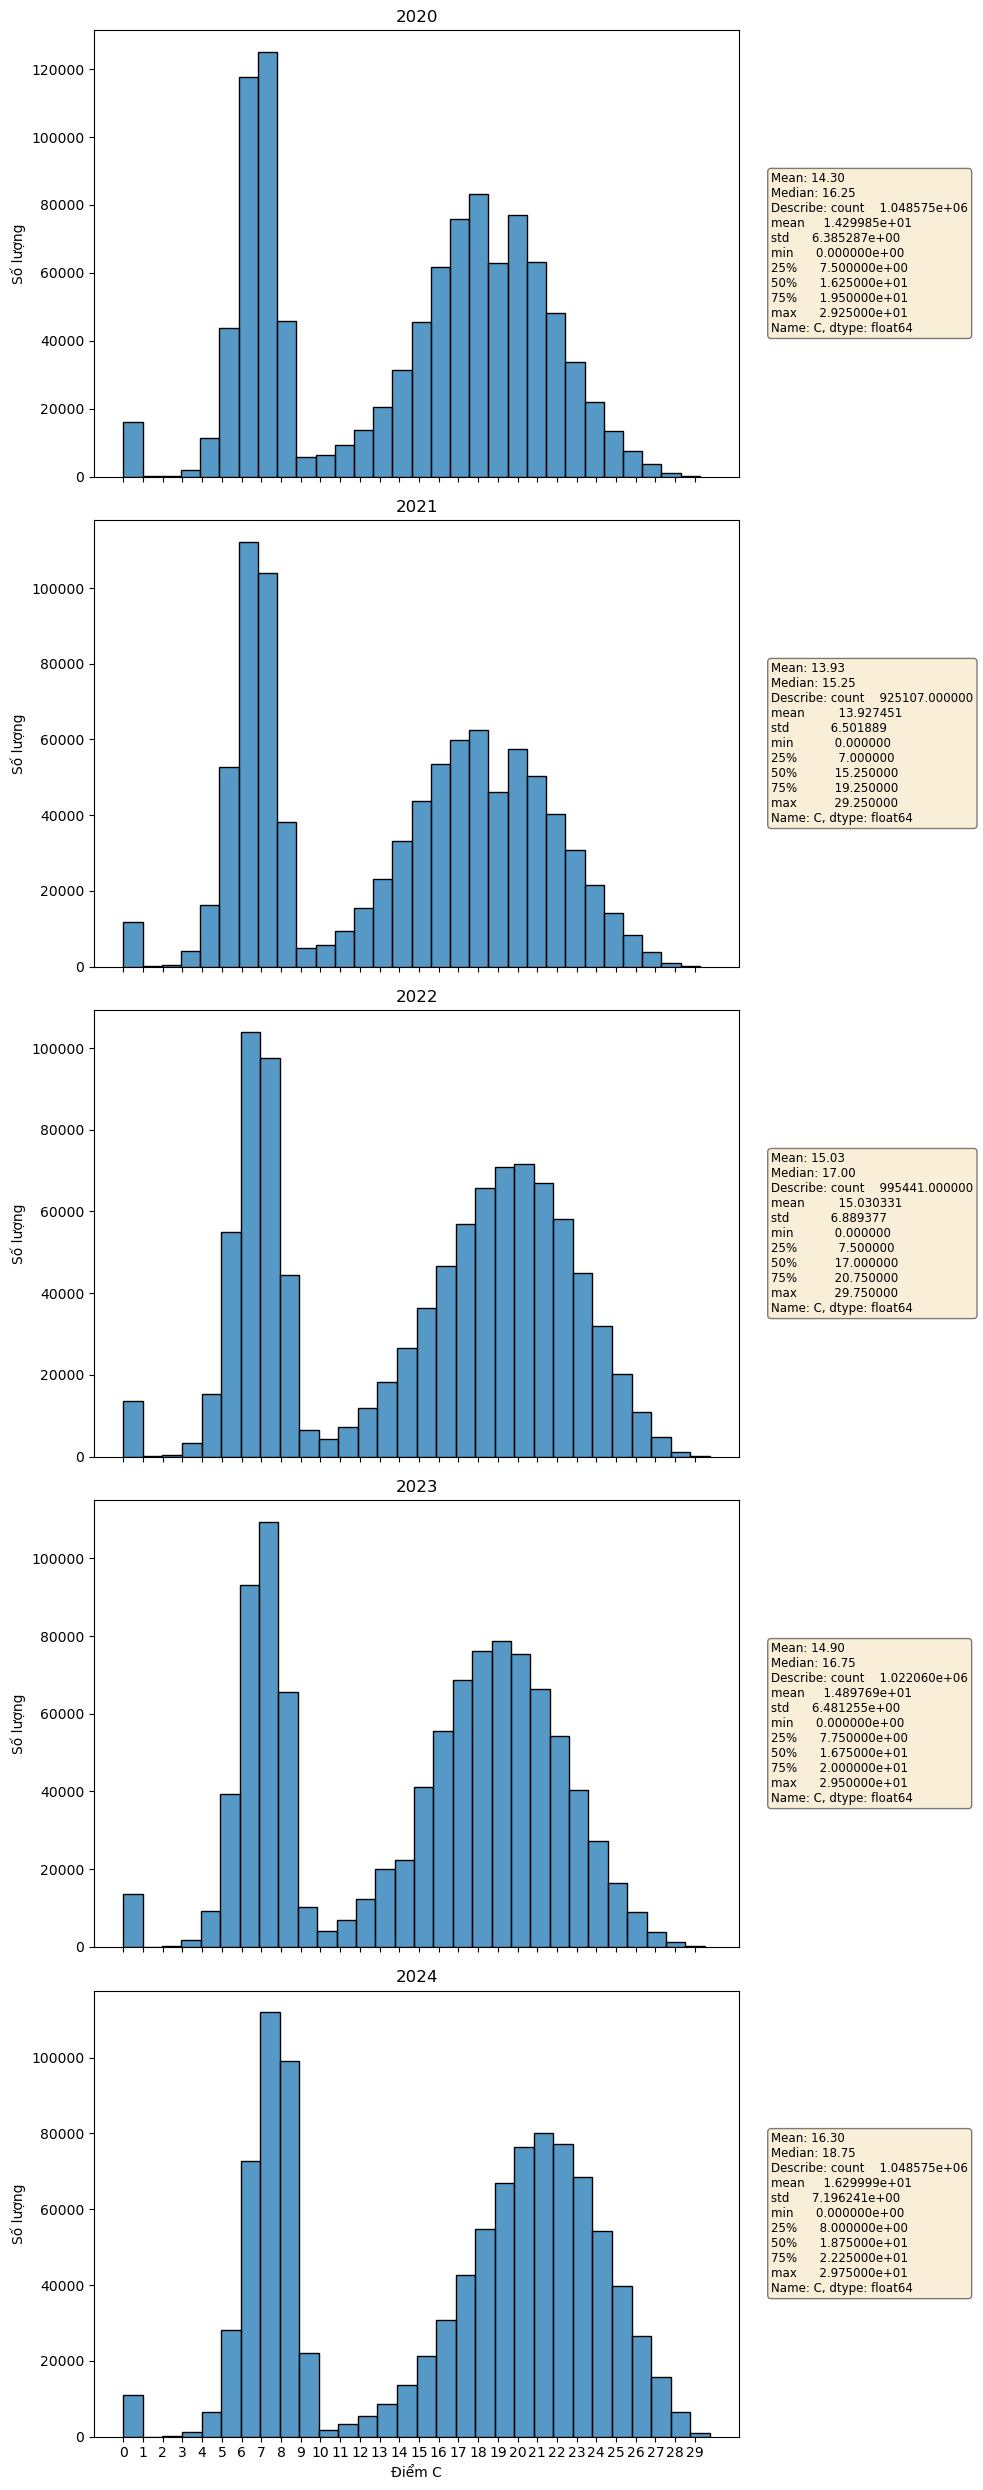

In [13]:
sub = 'C'

recent_years = df_all[df_all['year'].isin([2020, 2021, 2022, 2023, 2024])]

Score = list(range(0, 30, 1))

recent_years_sorted = sorted(recent_years['year'].unique())

# sắp xếp số lượng subplots dựa trên số năm 
Fig, axes = plt.subplots(len(recent_years_sorted), 1, figsize=(10, 5 * len(recent_years_sorted)), sharex=True)

# If only one subplot, convert axes to a list for consistency
if len(recent_years_sorted) == 1:
    axes = [axes]

for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year][sub], bins=30, kde=False, ax=axes[i], edgecolor='black')
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel(f'Điểm {sub}')
    axes[i].set_ylabel('Số lượng')

    year_data = recent_years[recent_years['year'] == year][sub].dropna()
    mean = year_data.mean()
    median = year_data.median()
    df_all_describe = year_data.describe()

    textstr = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nDescribe: {df_all_describe}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[i].text(1.05, 0.5, textstr, transform=axes[i].transAxes, fontsize=8.5,
                 verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(Score)
plt.tight_layout()
plt.show()

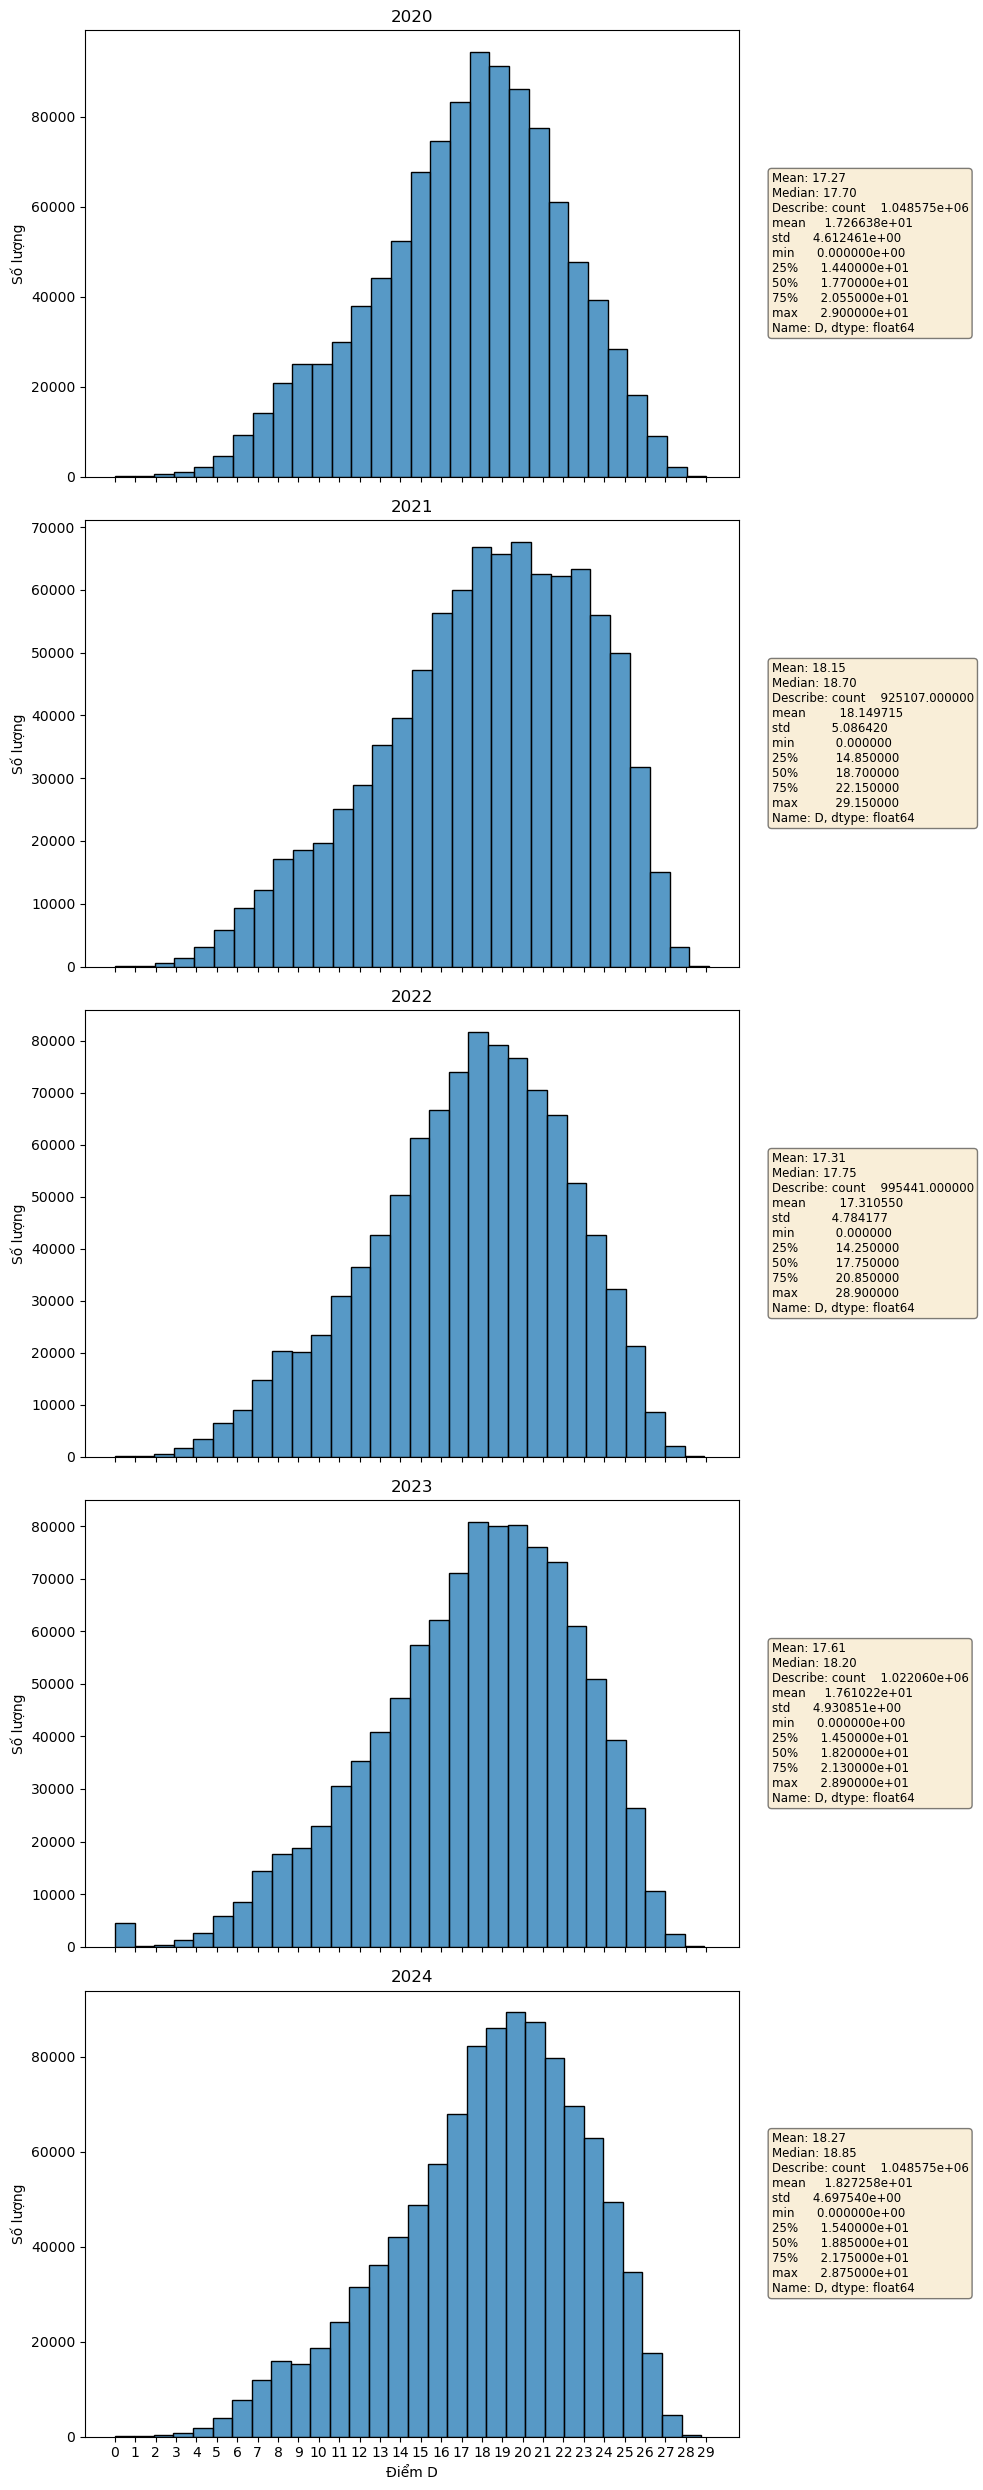

In [14]:
sub = 'D'

recent_years = df_all[df_all['year'].isin([2020, 2021, 2022, 2023, 2024])]

Score = list(range(0, 30, 1))

recent_years_sorted = sorted(recent_years['year'].unique())

# sắp xếp số lượng subplots dựa trên số năm 
Fig, axes = plt.subplots(len(recent_years_sorted), 1, figsize=(10, 5 * len(recent_years_sorted)), sharex=True)

# Nếu chỉ có 1 năm thì lấy là chính nó
if len(recent_years_sorted) == 1:
    axes = [axes]

for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year][sub], bins=30, kde=False, ax=axes[i], edgecolor='black')
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel(f'Điểm {sub}')
    axes[i].set_ylabel('Số lượng')

    year_data = recent_years[recent_years['year'] == year][sub].dropna()
    mean = year_data.mean()
    median = year_data.median()
    df_all_describe = year_data.describe()

    textstr = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nDescribe: {df_all_describe}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[i].text(1.05, 0.5, textstr, transform=axes[i].transAxes, fontsize=8.5,
                 verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(Score)
plt.tight_layout()
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
# Lựa chọn các đặc trưng (features) và cột mục tiêu
features = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'year']
target = 'A'  # Ví dụ cho điểm chuẩn khối A

# Điền giá trị trung vị cho các cột có giá trị thiếu
df_all[features] = df_all[features].fillna(df_all[features].median())
df_all[target] = df_all[target].fillna(df_all[target].median())

# Kiểm tra số lượng mẫu dữ liệu còn lại
print("Số lượng mẫu dữ liệu còn lại sau khi xử lý:", len(df_all))
print(df_all.head())  # Hiển thị một số mẫu dữ liệu

# Nếu dữ liệu đủ lớn, tiến hành chia tập huấn luyện và kiểm thử
if len(df_all) > 1:
    # Tách dữ liệu thành tập huấn luyện và tập kiểm thử
    X = df_all[features]
    y = df_all[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Khởi tạo và huấn luyện mô hình Hồi quy tuyến tính
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Dự báo trên tập kiểm thử
    y_pred = model.predict(X_test)

    # Đánh giá mô hình
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared (R2): {r2:.2f}")

    # Kiểm tra một số dự báo mẫu
    df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    print(df_results.head())
else:
    print("Không đủ dữ liệu để chia thành tập huấn luyện và tập kiểm thử.")

Số lượng mẫu dữ liệu còn lại sau khi xử lý: 5039758
        sbd  dia_li  gdcd  hoa_hoc  lich_su  ngoai_ngu  ngu_van  sinh_hoc  \
0  44000001     NaN   NaN     8.00      NaN        4.4     7.50      5.50   
1  44000002     NaN   NaN     8.25      NaN        5.0     6.00      6.25   
2  44000003     NaN   NaN     4.50      NaN        4.0     5.00      5.75   
3  44000004     7.5  9.25     7.00     9.25        7.4     6.75      5.75   
4  44000005     8.0  9.00     7.00     8.50        9.2     7.00      5.75   

   toan  vat_li  year      A     A1      B     C      D  
0   8.4    7.75  2020  24.15  20.55  21.90   7.5  20.30  
1   7.6    7.00  2020  22.85  14.60  22.10   6.0  13.60  
2   7.0    4.50  2020  16.00  15.50  17.25   5.0  16.00  
3   7.2    7.00  2020   7.20  14.60   7.20  23.5  21.35  
4   7.6    7.00  2020   7.60  16.80   7.60  23.5  23.80  
Mean Squared Error (MSE): 28.86
R-squared (R2): 0.50
         Actual  Predicted
4817457     3.4   1.530118
3293058     7.0  11.237968
526

In [17]:
from sklearn.ensemble import RandomForestRegressor

# Khởi tạo và huấn luyện mô hình Random Forest Regression
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Dự báo trên tập kiểm thử
y_pred_rf = model_rf.predict(X_test)

# Đánh giá mô hình
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Random Forest - R-squared (R2): {r2_rf:.2f}")


Random Forest - Mean Squared Error (MSE): 0.23
Random Forest - R-squared (R2): 1.00


In [18]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Khởi tạo và huấn luyện mô hình Gradient Boosting Regression
model_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_gb.fit(X_train, y_train)

# Dự báo trên tập kiểm thử
y_pred_gb = model_gb.predict(X_test)

# Đánh giá mô hình
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting - Mean Squared Error (MSE): {mse_gb:.2f}")
print(f"Gradient Boosting - R-squared (R2): {r2_gb:.2f}")

Gradient Boosting - Mean Squared Error (MSE): 1.00
Gradient Boosting - R-squared (R2): 0.98
